In [1]:
import pandas as pd
import json

In [ ]:
json_fp = open("/content/captions_val2014.json")
coco_captions = json.load(json_fp)
coco_captions_sub = coco_captions["annotations"]
len(coco_captions_sub)

202654

In [2]:
results_df = pd.read_excel("/content/ofa_results_final.xlsx")
results_df.drop_duplicates(inplace=True)

In [3]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [4]:
results_df.head()

,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers
0,Q: What is the person doing?,A: The person is watching tv.,a person is on a living room couch watching tv...,341118,A He is watching TV,A He is sitting in the living room of a hotel ...,A He is watching TV,A He is sitting in front of the TV,A He is watching TV
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda
2,Q: What is the bus doing?,A: Going down the street,there is a bus going down the street and many ...,129957,A The bus is going to pick up some people,A The bus is going to the bus station,A The bus is going to San Francisco,A The bus is going to the mall Q: Why is the b...,A The bus is going to the beach
3,Q: What are the cars doing?,A: Going behind the bus,there is a bus going down the street and many ...,129957,A They're waiting for the bus,NaN,A They're waiting for the bus,A They are trying to get to the other side of ...,A They're waiting for the bus
4,Q: What is the man doing?,A: The man is sitting on a horse.,a man in a police uniform sitting on a horse b...,224104,A He is riding a horse,A He is riding a horse,A He is riding a horse,A He is standing in front of the Washington Mo...,A He is riding a horse


In [5]:
def get_statistics(col_name):
  try:
    results_df.drop(["final_verdict"],axis=1)
  except:
    pass
  final_verdict = []
  for row in results_df.iterrows():
    if str(row[1][col_name]).lower() in str(row[1]["Mistral_Answers"]).lower() or similar(str(row[1]["Mistral_Answers"]),str(row[1][col_name]))>=0.4:
      final_verdict.append("Answer Matched")
    elif str(row[1][col_name])=="nan":
      final_verdict.append("Model Not Answered")
    else:
      final_verdict.append("Answer Did not Match")

  results_df["Final_Verdict"] = final_verdict
  return results_df["Final_Verdict"].value_counts()

In [6]:
get_statistics("OFA_Answers")

Answer Did not Match    194
Answer Matched          156
Model Not Answered      131
Name: Final_Verdict, dtype: int64

In [7]:
get_statistics("Blurred_Image_OFA_Answers")

Model Not Answered      182
Answer Did not Match    157
Answer Matched          142
Name: Final_Verdict, dtype: int64

In [8]:
get_statistics("Embossed_Image_OFA_Answers")

Answer Did not Match    196
Answer Matched          163
Model Not Answered      122
Name: Final_Verdict, dtype: int64

In [9]:
get_statistics("Solarized_Image_OFA_Answers")

Answer Did not Match    175
Model Not Answered      162
Answer Matched          144
Name: Final_Verdict, dtype: int64

In [10]:
get_statistics("Equalized_Image_OFA_Answers")

Answer Did not Match    189
Answer Matched          154
Model Not Answered      138
Name: Final_Verdict, dtype: int64

In [11]:
unmatched_rows = results_df[results_df["Final_Verdict"]=="Answer Did not Match"]
unmatched_rows.shape

(189, 10)

In [12]:
unmatched_rows

,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda,Answer Did not Match
5,Q: What is the man wearing?,A: The man is wearing a police uniform.,a man in a police uniform sitting on a horse b...,224104,A He is a police officer,A He is a police officer,A He is a police officer,A He is a police officer,A: A horse,Answer Did not Match
10,Q: What are the cows doing?,A: Enjoying the grass and sunshine.,A bunch of cows enjoying the grass and sunshine.,567253,A They are eating grass,A They're eating grass,A They are eating grass,A They are eating grass,A They are eating grass,Answer Did not Match
13,Q: What are the people eating?,A: Hot dogs and fries,People sit around a table full of hot dogs and...,280230,A Hot dogs,A They're eating hot dogs,A: Hot dogs,A Hot dogs,A They're eating hot dogs,Answer Did not Match
16,Q: What is the color of the cupcake?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A It is called a Caramel Apple Cupcake,NaN,A It is called a Caramel Apple Cupcake,A It's blue,A It is called a Caramel Apple Cupcake,Answer Did not Match
...,...,...,...,...,...,...,...,...,...,...
471,Q: What is the woman doing?,A: Standing,A woman is standing on the beach with dogs.,33405,A She is sitting on a log with her dog,A She is fishing,A She is sitting on a log with her dog,A She is sitting on a log with her dog,A She is sitting on a log with her dog,Answer Did not Match
477,Q: What is the person doing?,A: Jumping,A person jumping in the air catching a Frisbee.,276151,A He is throwing a frisbee,A He is holding a soccer ball,A He is throwing a frisbee,A He is throwing a football,A He is throwing a frisbee,Answer Did not Match
478,Q: What is the person catching?,A: Frisbee,A person jumping in the air catching a Frisbee.,276151,A The person catching the disc,A The person catching is the person who is thr...,A The person catching the disc,A The person catching the disc,A The person catching the disc,Answer Did not Match
482,Q: What is the dessert?,"A: Cakes, pies, and cupcakes.","A table is full of desserts including cakes, p...",114184,A: Pie,A Pies!,"A Pumpkin pie, chocolate chip cookies, brownie...","A Cake, cupcakes, cookies, brownies, etc",A: Pie,Answer Did not Match


In [13]:
def compare_answer(string1,string2):
  if str(string2).lower() in str(string1).lower() or similar(str(string2).lower(),str(string1).lower())>=0.4:
    return True
  return False

In [14]:
def get_unmatched_rows(col1,col2):
  conflict = pd.DataFrame()
  conflict = unmatched_rows[unmatched_rows[col1]!=unmatched_rows[col2]]
  print("No. of Unmatched Rows Between "+col1+" and "+col2+" are :-",conflict.shape)
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)
  print("No. of Rows Unmatched with "+col1+ " and "+col2+" but the no. of rows matched with actual Mistral Answers are ",conflict[conflict["conflicted_rows"]==True].shape)
  return conflict



In [15]:
get_unmatched_rows("OFA_Answers","Blurred_Image_OFA_Answers")

No. of Unmatched Rows Between OFA_Answers and Blurred_Image_OFA_Answers are :- (165, 10)
No. of Rows Unmatched with OFA_Answers and Blurred_Image_OFA_Answers but the no. of rows matched with actual Mistral Answers are  (31, 11)


<ipython-input-14-513ded9aa1b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)


,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict,conflicted_rows
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda,Answer Did not Match,False
10,Q: What are the cows doing?,A: Enjoying the grass and sunshine.,A bunch of cows enjoying the grass and sunshine.,567253,A They are eating grass,A They're eating grass,A They are eating grass,A They are eating grass,A They are eating grass,Answer Did not Match,False
13,Q: What are the people eating?,A: Hot dogs and fries,People sit around a table full of hot dogs and...,280230,A Hot dogs,A They're eating hot dogs,A: Hot dogs,A Hot dogs,A They're eating hot dogs,Answer Did not Match,True
16,Q: What is the color of the cupcake?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A It is called a Caramel Apple Cupcake,NaN,A It is called a Caramel Apple Cupcake,A It's blue,A It is called a Caramel Apple Cupcake,Answer Did not Match,False
18,Q: What is the lady wearing?,A: A black and orange Halloween costume.,A lady in a black and orange Halloween costume.,205238,A She's a witch!,A She is wearing a Halloween costume,A She's a witch!,A She's a witch!,A She's a witch!,Answer Did not Match,True
...,...,...,...,...,...,...,...,...,...,...,...
471,Q: What is the woman doing?,A: Standing,A woman is standing on the beach with dogs.,33405,A She is sitting on a log with her dog,A She is fishing,A She is sitting on a log with her dog,A She is sitting on a log with her dog,A She is sitting on a log with her dog,Answer Did not Match,False
477,Q: What is the person doing?,A: Jumping,A person jumping in the air catching a Frisbee.,276151,A He is throwing a frisbee,A He is holding a soccer ball,A He is throwing a frisbee,A He is throwing a football,A He is throwing a frisbee,Answer Did not Match,False
478,Q: What is the person catching?,A: Frisbee,A person jumping in the air catching a Frisbee.,276151,A The person catching the disc,A The person catching is the person who is thr...,A The person catching the disc,A The person catching the disc,A The person catching the disc,Answer Did not Match,False
482,Q: What is the dessert?,"A: Cakes, pies, and cupcakes.","A table is full of desserts including cakes, p...",114184,A: Pie,A Pies!,"A Pumpkin pie, chocolate chip cookies, brownie...","A Cake, cupcakes, cookies, brownies, etc",A: Pie,Answer Did not Match,False


In [16]:
conflict_df = get_unmatched_rows("OFA_Answers","Embossed_Image_OFA_Answers")
conflict_df

No. of Unmatched Rows Between OFA_Answers and Embossed_Image_OFA_Answers are :- (46, 10)
No. of Rows Unmatched with OFA_Answers and Embossed_Image_OFA_Answers but the no. of rows matched with actual Mistral Answers are  (11, 11)


<ipython-input-14-513ded9aa1b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)


,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict,conflicted_rows
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda,Answer Did not Match,False
13,Q: What are the people eating?,A: Hot dogs and fries,People sit around a table full of hot dogs and...,280230,A Hot dogs,A They're eating hot dogs,A: Hot dogs,A Hot dogs,A They're eating hot dogs,Answer Did not Match,True
38,Q: What is the name of the jacket?,A: Olympic jacket,A snowboarder with an olympic jacket is in mid...,227855,A It's called a snowboard jacket Q: What is th...,A The name of the jacket is called a parka Q: ...,A The name of the jacket isA the Olympic jacke...,A The name of the jacket is called aÂ skate ja...,A The name of the jacket isA the Olympic jacke...,Answer Did not Match,False
43,Q: What is the name of the show?,A: MASH,A small tv is shown on a mantle with MASH play...,270603,NaN,A The White House,NaN,NaN,A The Green Room,Answer Did not Match,False
46,Q: What is the dog on?,A: a bed,A dog curled up on a bed on top of the covers.,440094,NaN,A The dog is on the bed,A The dog is on the bed,NaN,A The dog is on the bed,Answer Did not Match,False
50,Q: What is the man holding?,A: He is holding a Frisbee.,A man who is doing a trick with a Frisbee.,529166,A: A disc,A The man is holding a football,A The man is holding a Frisbee,A The man is holding a disc,A: A disc,Answer Did not Match,True
83,Q: What is the color of the television?,A: Black,A living room with a sofa chair and television.,546934,ã€The color of the television is blackã€‘,A The color of the television is white,A It is black,ã€The color of the television is blackã€‘,ã€The color of the television is blackã€‘,Answer Did not Match,True
114,Q: What is the color of the tile?,A: Black,A bathroom with orange walls and black tile fe...,136033,A The color of the tile in the bathroom isA Te...,A The color of the tile isA Orange,A The color of the tile in the restroom isA th...,A The color of the tile isA green,A The color of the tile in the bathroom isA Te...,Answer Did not Match,False
123,Q: What is the name of the table?,A: A table overflowing with many kids of dough...,A table overflowing with many kids of doughnuts.,255529,A Doughnuts!,Q:,NaN,A Doughnuts!,A Doughnuts!,Answer Did not Match,False
188,Q: Where are the people waiting?,A: Near a bus stop,People are waiting for the bus near a bus stop.,139011,A They are waiting for the RAPIDRIDE!,A They are waiting for the bus,A They are waiting for the RAPIDride,A They are waiting for the RAPIDRIDE!,A They are waiting for the RAPIDRIDE!,Answer Did not Match,False


In [17]:
get_unmatched_rows("OFA_Answers","Solarized_Image_OFA_Answers")

No. of Unmatched Rows Between OFA_Answers and Solarized_Image_OFA_Answers are :- (89, 10)
No. of Rows Unmatched with OFA_Answers and Solarized_Image_OFA_Answers but the no. of rows matched with actual Mistral Answers are  (17, 11)


<ipython-input-14-513ded9aa1b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)


,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict,conflicted_rows
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda,Answer Did not Match,False
16,Q: What is the color of the cupcake?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A It is called a Caramel Apple Cupcake,NaN,A It is called a Caramel Apple Cupcake,A It's blue,A It is called a Caramel Apple Cupcake,Answer Did not Match,True
17,Q: What is the color of the saucer?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A The saucer is white,A The saucer is white,A The saucer is white,A The saucer is blue,A The saucer is green,Answer Did not Match,False
24,Q: What is the color of the bench?,A: Black,A umbrella that is behind a bench with a telev...,493435,A The bench is green,A The bench is black,A The bench is green,NaN,A The bench is green,Answer Did not Match,False
35,Q: What is the young woman doing?,A: She is sitting next to the table holding a ...,The young woman is sitting next to the table h...,169500,A The young woman is knitting,A She is sitting at a table in a restaurant,A The young woman is knitting,A She is taking a photo of herself,A She is knitting,Answer Did not Match,True
...,...,...,...,...,...,...,...,...,...,...,...
465,Q: How many sinks are there in the bathroom?,A: 4,"A bathroom has four sinks, four mirrors, and a...",151651,A There are three sinks in the bathroom,A There are three sinks in the bathroom,A There are three sinks in the bathroom,A One,A There are three sinks in the bathroom,Answer Did not Match,False
466,Q: How many mirrors are there in the bathroom?,A: 4,"A bathroom has four sinks, four mirrors, and a...",151651,A There are three,NaN,A There are three,A One,A There are three mirrors in the bathroom,Answer Did not Match,False
477,Q: What is the person doing?,A: Jumping,A person jumping in the air catching a Frisbee.,276151,A He is throwing a frisbee,A He is holding a soccer ball,A He is throwing a frisbee,A He is throwing a football,A He is throwing a frisbee,Answer Did not Match,False
482,Q: What is the dessert?,"A: Cakes, pies, and cupcakes.","A table is full of desserts including cakes, p...",114184,A: Pie,A Pies!,"A Pumpkin pie, chocolate chip cookies, brownie...","A Cake, cupcakes, cookies, brownies, etc",A: Pie,Answer Did not Match,True


In [18]:
get_unmatched_rows("OFA_Answers","Equalized_Image_OFA_Answers")

No. of Unmatched Rows Between OFA_Answers and Equalized_Image_OFA_Answers are :- (48, 10)
No. of Rows Unmatched with OFA_Answers and Equalized_Image_OFA_Answers but the no. of rows matched with actual Mistral Answers are  (5, 11)


<ipython-input-14-513ded9aa1b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)


,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict,conflicted_rows
5,Q: What is the man wearing?,A: The man is wearing a police uniform.,a man in a police uniform sitting on a horse b...,224104,A He is a police officer,A He is a police officer,A He is a police officer,A He is a police officer,A: A horse,Answer Did not Match,False
13,Q: What are the people eating?,A: Hot dogs and fries,People sit around a table full of hot dogs and...,280230,A Hot dogs,A They're eating hot dogs,A: Hot dogs,A Hot dogs,A They're eating hot dogs,Answer Did not Match,True
17,Q: What is the color of the saucer?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A The saucer is white,A The saucer is white,A The saucer is white,A The saucer is blue,A The saucer is green,Answer Did not Match,False
22,Q: What is the color of the bushes?,A: Green,THERE ARE A LOT OF BUSHES IN THE FIELD,217005,A The leaves of the trilliums are green,A The bushes are green,A The leaves of the trilliums are green,A The leaves of the trilliums are green,A They are called trilliums,Answer Did not Match,False
35,Q: What is the young woman doing?,A: She is sitting next to the table holding a ...,The young woman is sitting next to the table h...,169500,A The young woman is knitting,A She is sitting at a table in a restaurant,A The young woman is knitting,A She is taking a photo of herself,A She is knitting,Answer Did not Match,False
38,Q: What is the name of the jacket?,A: Olympic jacket,A snowboarder with an olympic jacket is in mid...,227855,A It's called a snowboard jacket Q: What is th...,A The name of the jacket is called a parka Q: ...,A The name of the jacket isA the Olympic jacke...,A The name of the jacket is called aÂ skate ja...,A The name of the jacket isA the Olympic jacke...,Answer Did not Match,False
43,Q: What is the name of the show?,A: MASH,A small tv is shown on a mantle with MASH play...,270603,NaN,A The White House,NaN,NaN,A The Green Room,Answer Did not Match,False
46,Q: What is the dog on?,A: a bed,A dog curled up on a bed on top of the covers.,440094,NaN,A The dog is on the bed,A The dog is on the bed,NaN,A The dog is on the bed,Answer Did not Match,False
60,Q: What is the color of the man's jacket?,A: Blue,"Kite flying, unusual designed, orange oval s...",137300,A The man's jacket is yellow,A The man's jacket is yellow,A The man's jacket is yellow,A The man is wearing a parachute,A The man's jacket is orange,Answer Did not Match,False
107,Q: Where is the man?,A: He is in the park,A man prepares to catch the frisbee in the park,200770,A He's throwing a Frisbee,A He is playing football,A He's throwing a Frisbee,A He's throwing a Frisbee,A He's playing Frisbee,Answer Did not Match,True


In [19]:
get_unmatched_rows("Blurred_Image_OFA_Answers","Embossed_Image_OFA_Answers")

No. of Unmatched Rows Between Blurred_Image_OFA_Answers and Embossed_Image_OFA_Answers are :- (157, 10)
No. of Rows Unmatched with Blurred_Image_OFA_Answers and Embossed_Image_OFA_Answers but the no. of rows matched with actual Mistral Answers are  (24, 11)


<ipython-input-14-513ded9aa1b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)


,Mistral_Questions,Mistral_Answers,Captions,Image_Ids,OFA_Answers,Blurred_Image_OFA_Answers,Embossed_Image_OFA_Answers,Solarized_Image_OFA_Answers,Equalized_Image_OFA_Answers,Final_Verdict,conflicted_rows
1,Q: What is on the table?,A: There is a stuffed panda bear and a purse o...,a person is on a living room couch watching tv...,341118,A: A Panda,A: My wife and I are sitting in a hotel roomA ...,A Pandas,A: A TV,A: A Panda,Answer Did not Match,False
10,Q: What are the cows doing?,A: Enjoying the grass and sunshine.,A bunch of cows enjoying the grass and sunshine.,567253,A They are eating grass,A They're eating grass,A They are eating grass,A They are eating grass,A They are eating grass,Answer Did not Match,False
13,Q: What are the people eating?,A: Hot dogs and fries,People sit around a table full of hot dogs and...,280230,A Hot dogs,A They're eating hot dogs,A: Hot dogs,A Hot dogs,A They're eating hot dogs,Answer Did not Match,True
16,Q: What is the color of the cupcake?,A: White,A cupcake on a white saucer with cinnamon near...,15953,A It is called a Caramel Apple Cupcake,NaN,A It is called a Caramel Apple Cupcake,A It's blue,A It is called a Caramel Apple Cupcake,Answer Did not Match,False
18,Q: What is the lady wearing?,A: A black and orange Halloween costume.,A lady in a black and orange Halloween costume.,205238,A She's a witch!,A She is wearing a Halloween costume,A She's a witch!,A She's a witch!,A She's a witch!,Answer Did not Match,False
...,...,...,...,...,...,...,...,...,...,...,...
471,Q: What is the woman doing?,A: Standing,A woman is standing on the beach with dogs.,33405,A She is sitting on a log with her dog,A She is fishing,A She is sitting on a log with her dog,A She is sitting on a log with her dog,A She is sitting on a log with her dog,Answer Did not Match,False
477,Q: What is the person doing?,A: Jumping,A person jumping in the air catching a Frisbee.,276151,A He is throwing a frisbee,A He is holding a soccer ball,A He is throwing a frisbee,A He is throwing a football,A He is throwing a frisbee,Answer Did not Match,False
478,Q: What is the person catching?,A: Frisbee,A person jumping in the air catching a Frisbee.,276151,A The person catching the disc,A The person catching is the person who is thr...,A The person catching the disc,A The person catching the disc,A The person catching the disc,Answer Did not Match,False
482,Q: What is the dessert?,"A: Cakes, pies, and cupcakes.","A table is full of desserts including cakes, p...",114184,A: Pie,A Pies!,"A Pumpkin pie, chocolate chip cookies, brownie...","A Cake, cupcakes, cookies, brownies, etc",A: Pie,Answer Did not Match,True


In [20]:
def get_statistics(col_name):
  try:
    results_df.drop(["final_verdict"],axis=1)
  except:
    pass
  final_verdict = []
  for row in results_df.iterrows():
    if str(row[1][col_name]).lower() in str(row[1]["Mistral_Answers"]).lower() or similar(str(row[1]["Mistral_Answers"]),str(row[1][col_name]))>=0.4:
      final_verdict.append("Answer Matched")
    elif str(row[1][col_name])=="nan":
      final_verdict.append("Model Not Answered")
    else:
      final_verdict.append("Answer Did not Match")

  results_df["Final_Verdict"] = final_verdict
  return results_df["Final_Verdict"].value_counts()

def get_unmatched_rows(col1,col2):
  conflict = pd.DataFrame()
  conflict = unmatched_rows[unmatched_rows[col1]!=unmatched_rows[col2]]
  print("No. of Unmatched Rows Between "+col1+" and "+col2+" are :-",conflict.shape)
  conflict['conflicted_rows'] = conflict.apply(lambda x: compare_answer(x['Mistral_Answers'], x[col2]), axis=1)
  print("No. of Rows Unmatched with "+col1+ " and "+col2+" but the no. of rows matched with actual Mistral Answers are ",conflict[conflict["conflicted_rows"]==True].shape)
  return conflict

In [ ]:
from PIL import Image
import requests
from pycocotools.coco import COCO
import json
import skimage.io as io
annFile = "/content/captions_val2014.json"
coco=COCO(annFile)
images = []
titles = []
for row in unmatched_rows.iterrows():
  image_id = row[1]["Image_Ids"]
  ibp_answer = row[1]["IBP_Answers"]
  question=row[1]["Mistral_Questions"]
  answer=row[1]["Mistral_Answers"]
  title = f"Question is "+str(question)+"\n Answer is "+str(answer)+".\n Answer from IBP is "+str(ibp_answer)+".\n Image id is "+str(image_id)+"."
  try:
    img = coco.loadImgs(int(image_id))
    image = io.imread(img[0]['coco_url'])
    titles.append(title)
    images.append(image)
  except KeyError:
    print("Problem with Image with Id ",image_id)



loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


In [ ]:
import matplotlib.pyplot as plt
def plot_row_images(images, titles):
    num_rows = 12
    num_cols = 2

    fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,20))
    ax = ax.flatten()
    for i in range(len(images)):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title(titles[i],fontsize=8)


    plt.tight_layout()
    plt.show()

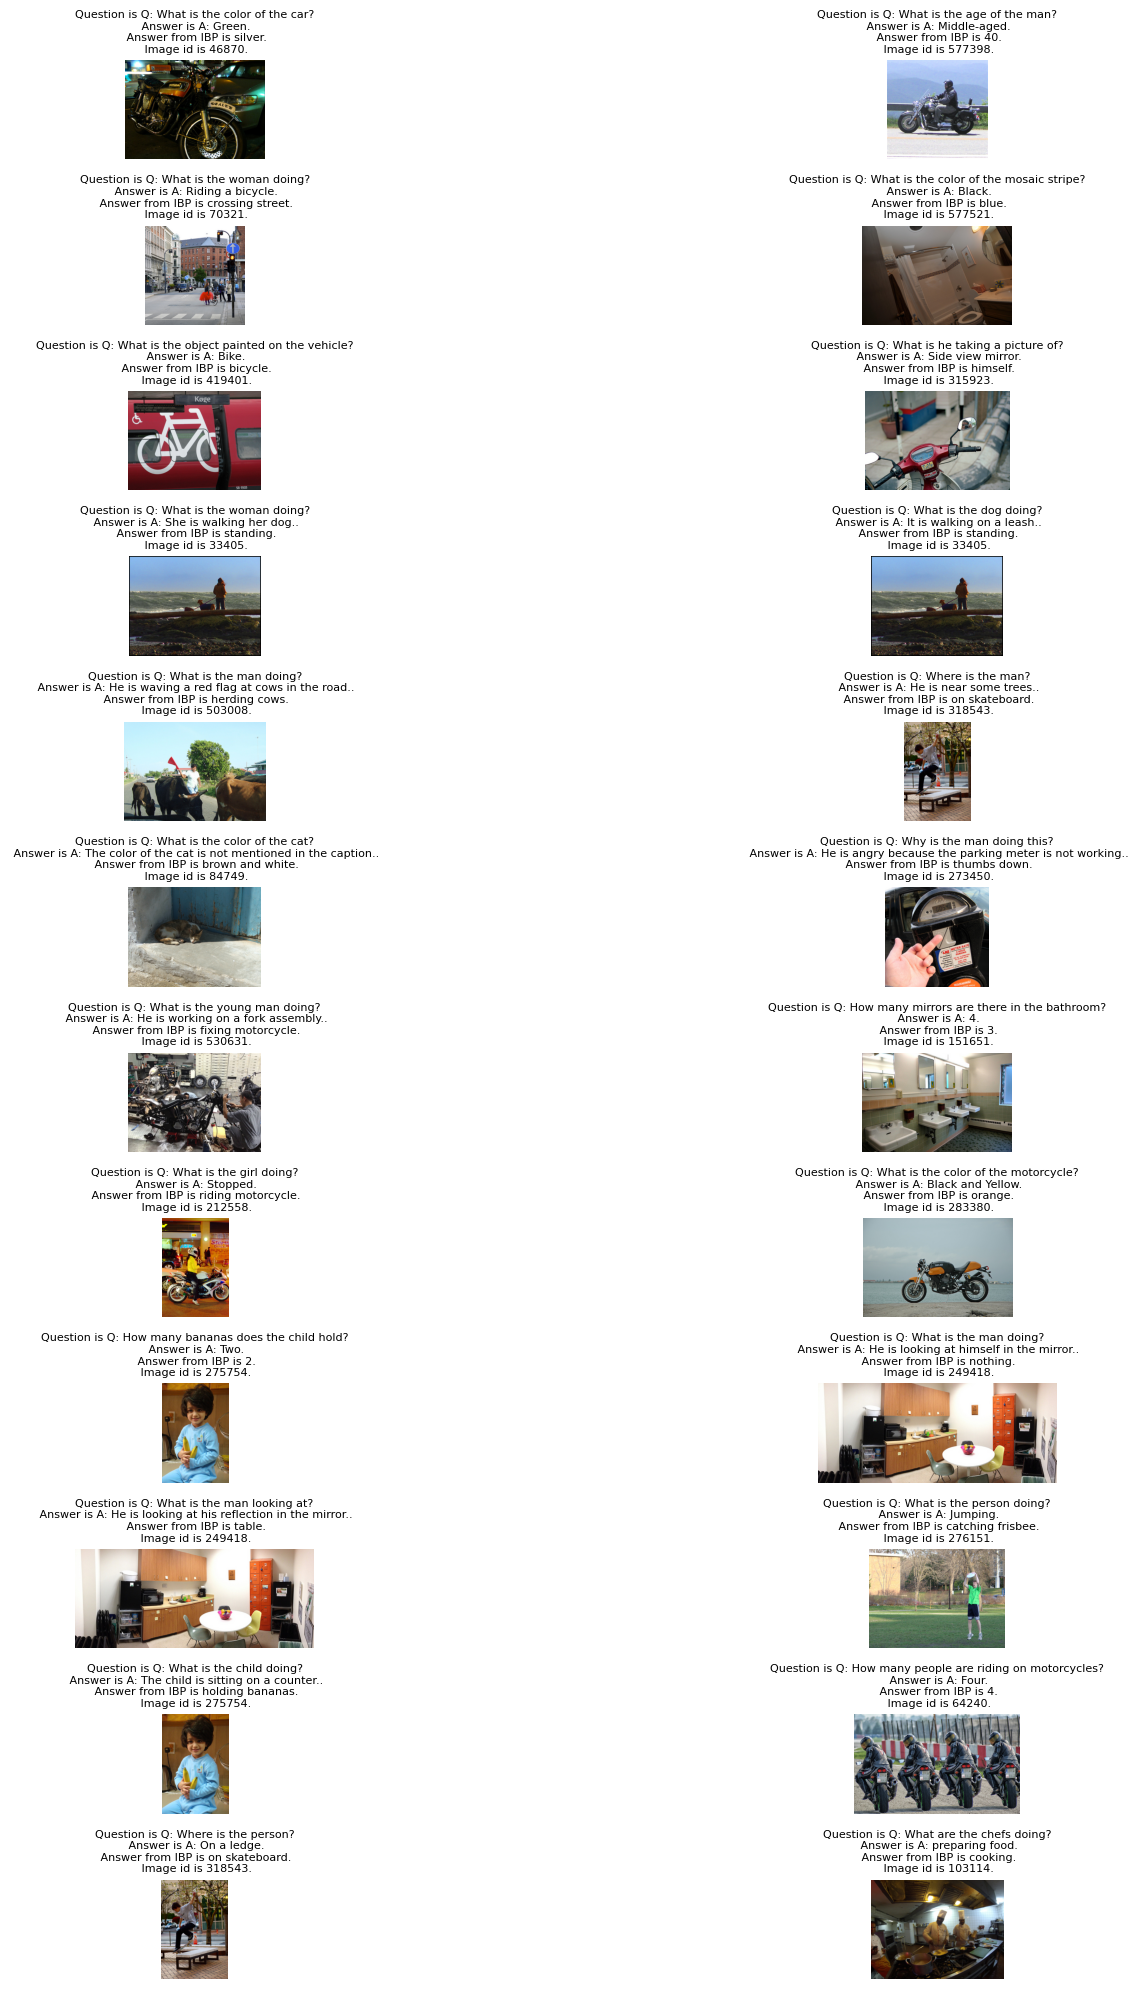

In [ ]:
plot_row_images(images, titles)